# Part 1 ‐ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15minute
time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

## Results
After running some data anlysis there is a pretty clear daily pattern. After breaking the data down into monthly, then daily chunks the pattern became more clear. Logins appear to jump up alot during the lunch hour (around noon) and the evening hours (after 21 and through the rest of the night). Based on these findings I would think that this location is a popular lunch  and a late night resturant.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

In [2]:
df = pd.read_json('logins.json')
df = pd.DataFrame(df)
df['count'] = 1

In [3]:
df_15 = pd.DataFrame(df.groupby([pd.Grouper(key='login_time', freq='15Min')]).sum()).reset_index()
df_15

,login_time,count
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1
...,...,...
9783,1970-04-13 17:45:00,5
9784,1970-04-13 18:00:00,5
9785,1970-04-13 18:15:00,2
9786,1970-04-13 18:30:00,7


In [4]:
df_15['dates'] = pd.to_datetime(df_15['login_time']).dt.date
df_15['times'] = pd.to_datetime(df_15['login_time']).dt.time
df_15['dates'] = pd.to_datetime(df_15['dates'])
df_15['month'] = df_15['dates'].dt.month
df_15['day'] = df_15['dates'].dt.day
df_15

,login_time,count,dates,times,month,day
0,1970-01-01 20:00:00,2,1970-01-01,20:00:00,1,1
1,1970-01-01 20:15:00,6,1970-01-01,20:15:00,1,1
2,1970-01-01 20:30:00,9,1970-01-01,20:30:00,1,1
3,1970-01-01 20:45:00,7,1970-01-01,20:45:00,1,1
4,1970-01-01 21:00:00,1,1970-01-01,21:00:00,1,1
...,...,...,...,...,...,...
9783,1970-04-13 17:45:00,5,1970-04-13,17:45:00,4,13
9784,1970-04-13 18:00:00,5,1970-04-13,18:00:00,4,13
9785,1970-04-13 18:15:00,2,1970-04-13,18:15:00,4,13
9786,1970-04-13 18:30:00,7,1970-04-13,18:30:00,4,13


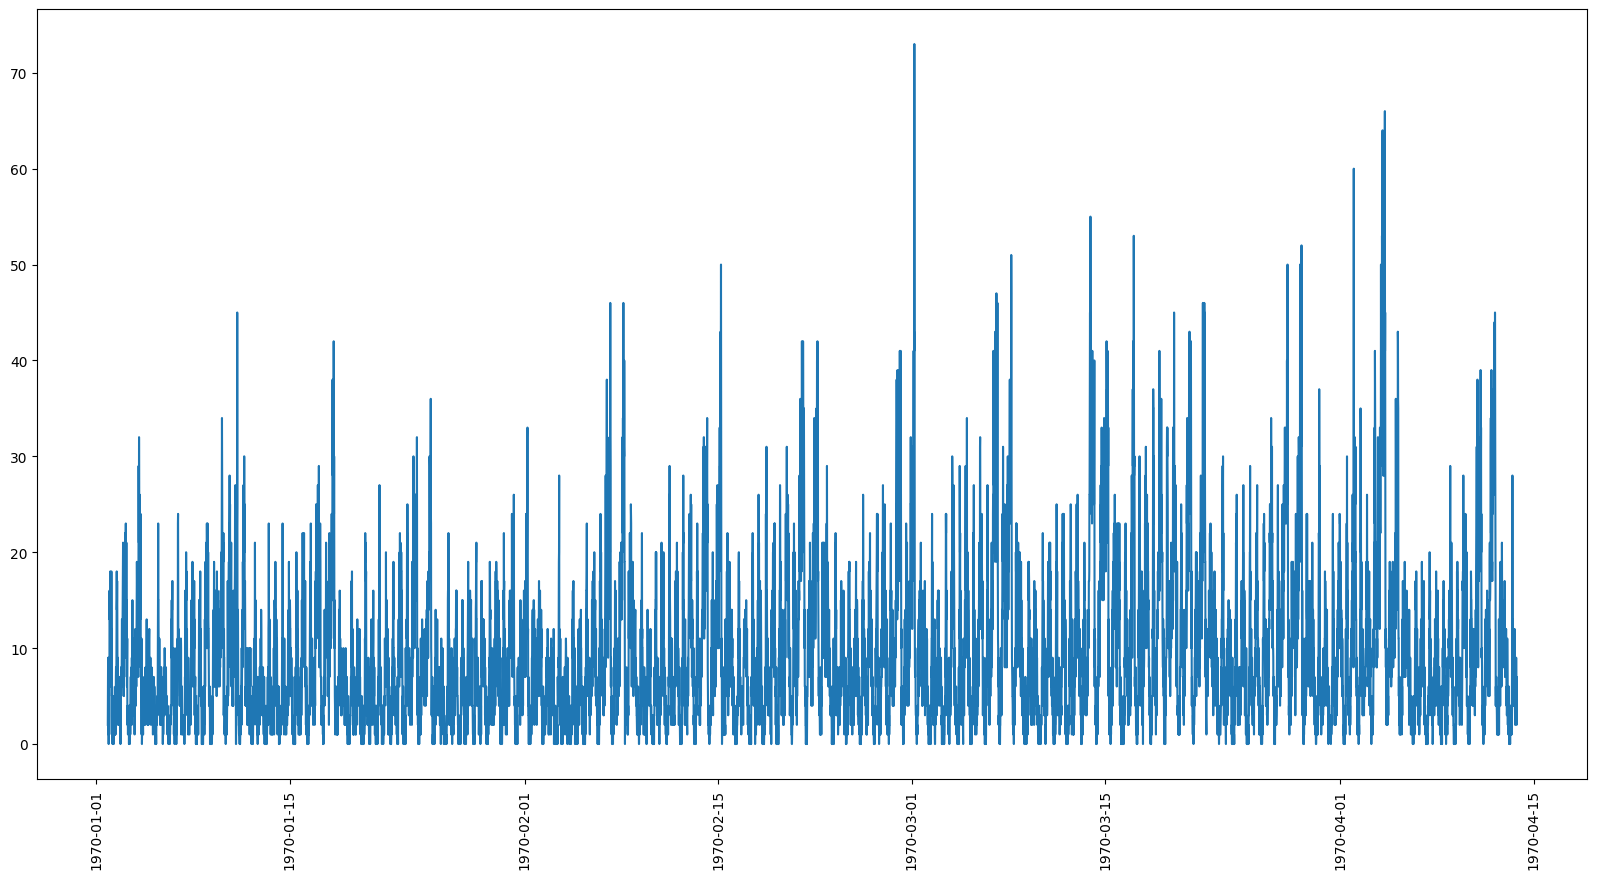

In [5]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.plot(df_15['login_time'], df_15['count'])
plt.xticks(rotation=90)
plt.show()

In [6]:
# Monthly breakdown
df_jan = df_15[df_15['month']==1]
df_feb = df_15[df_15['month']==2]
df_mar = df_15[df_15['month']==3]
df_apr = df_15[df_15['month']==4]

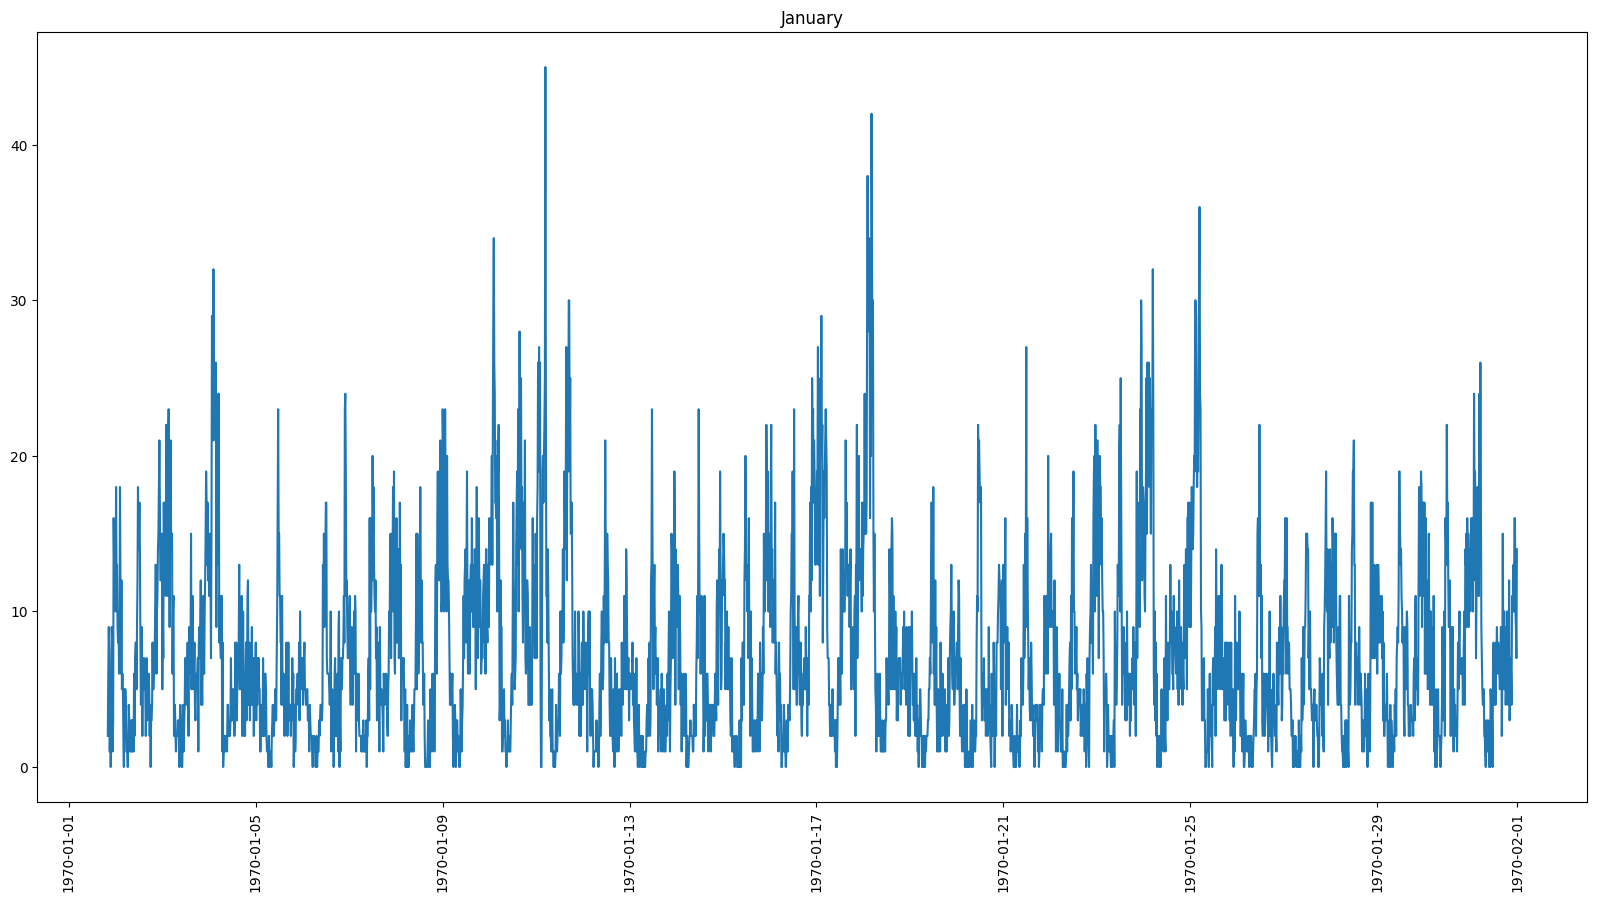

In [7]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.plot(df_jan['login_time'], df_jan['count'])
plt.xticks(rotation=90)
plt.title('January')
plt.show()

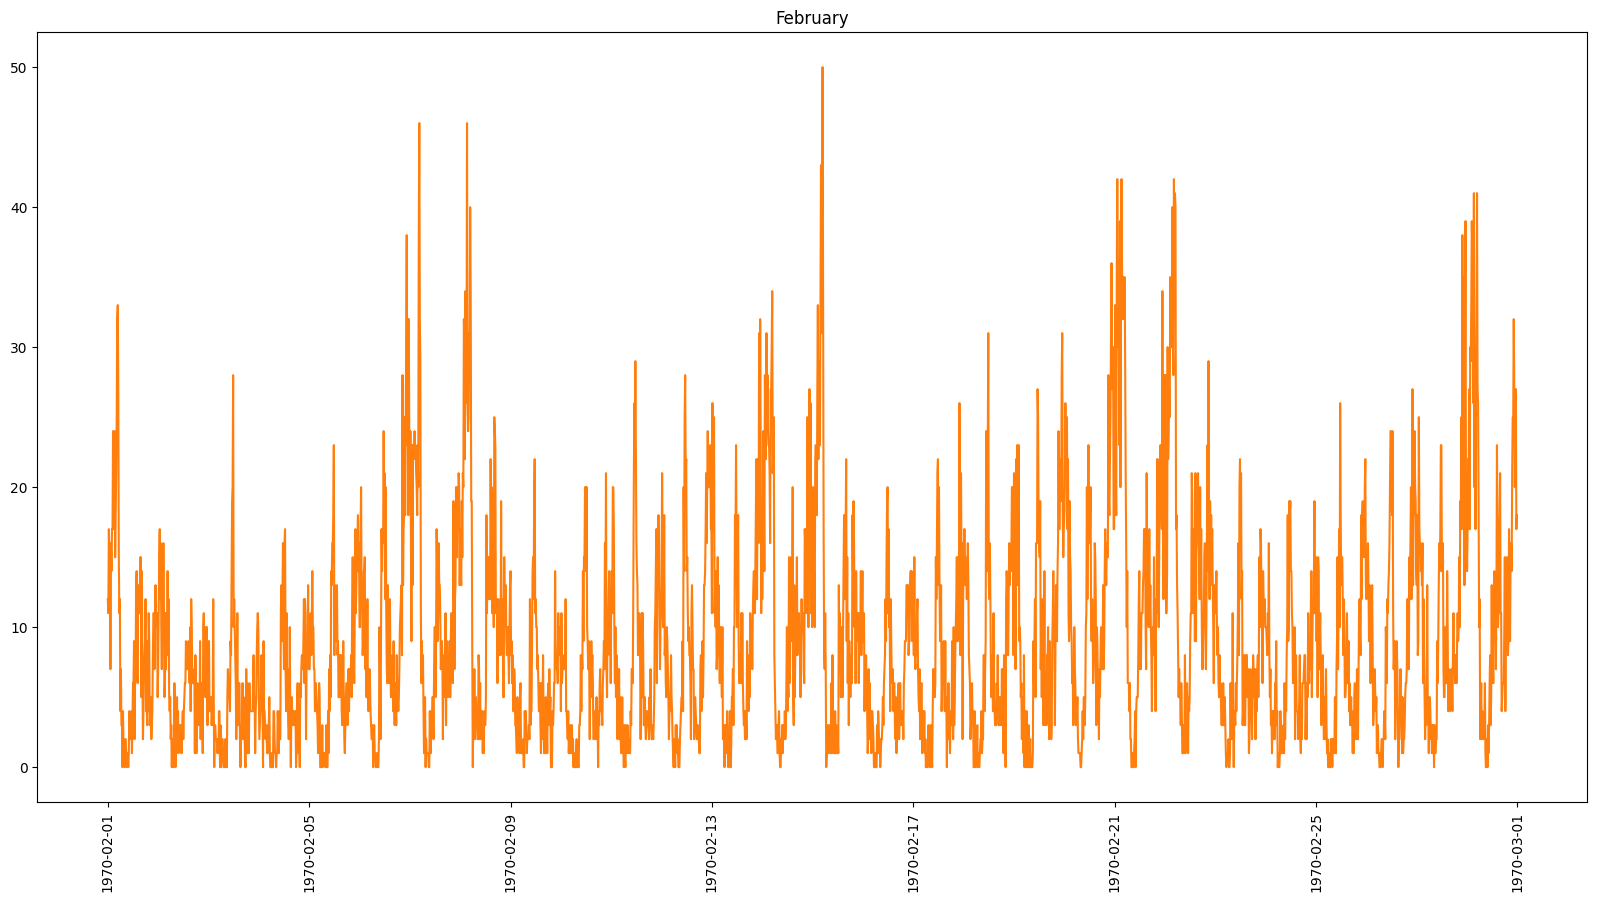

In [8]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.plot(df_feb['login_time'], df_feb['count'],'tab:orange')
plt.xticks(rotation=90)
plt.title('February')
plt.show()

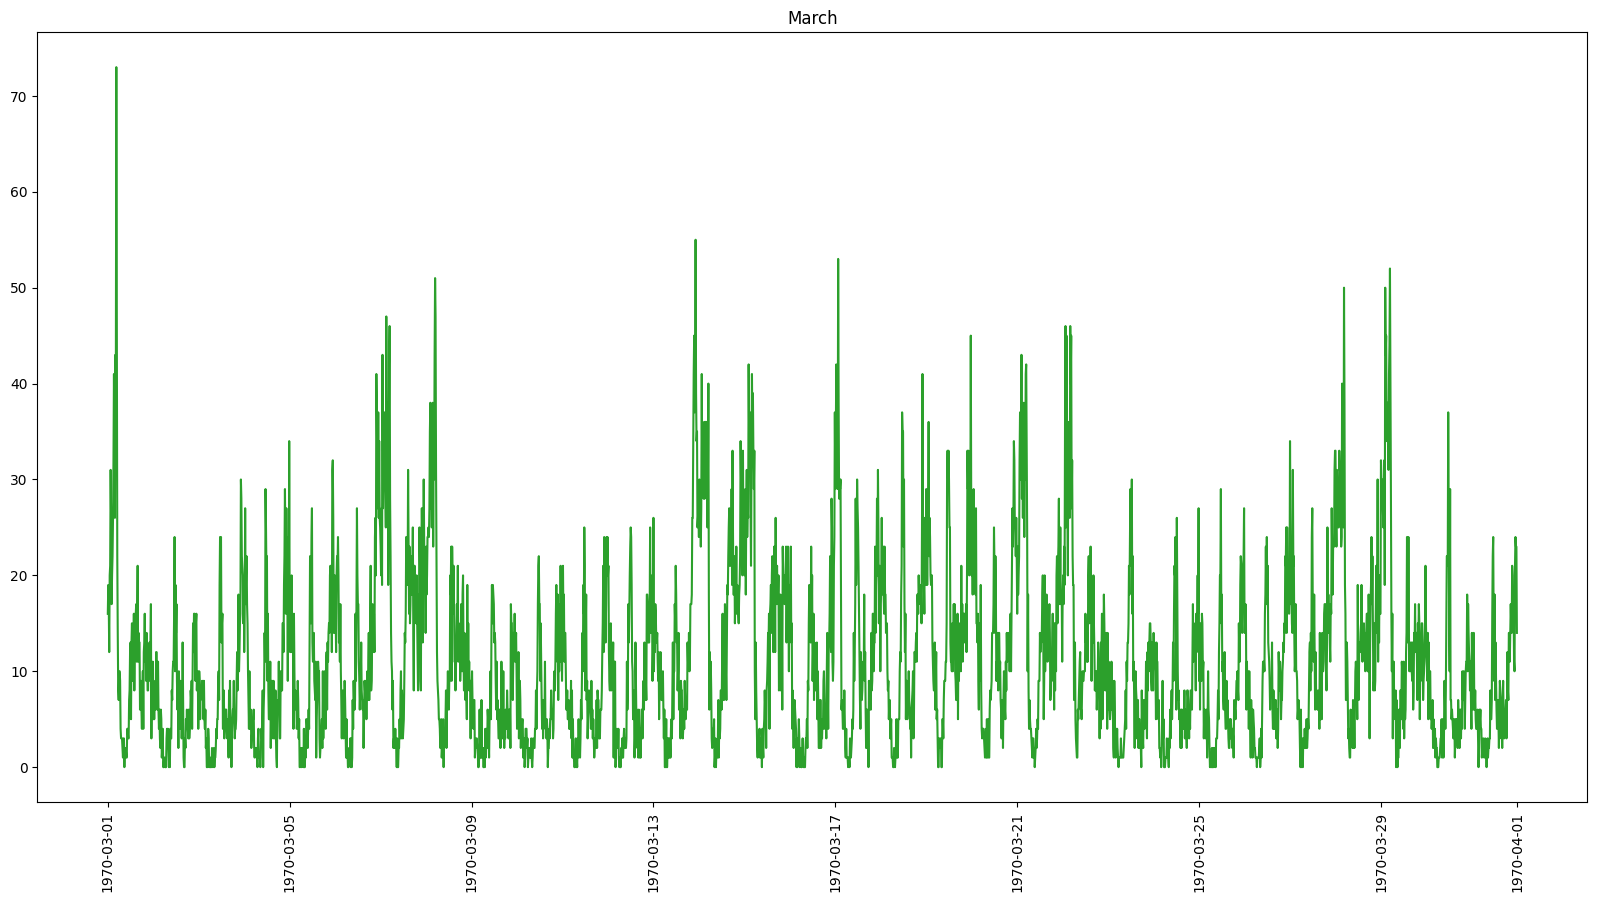

In [9]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.plot(df_mar['login_time'], df_mar['count'], 'tab:green')
plt.xticks(rotation=90)
plt.title('March')
plt.show()

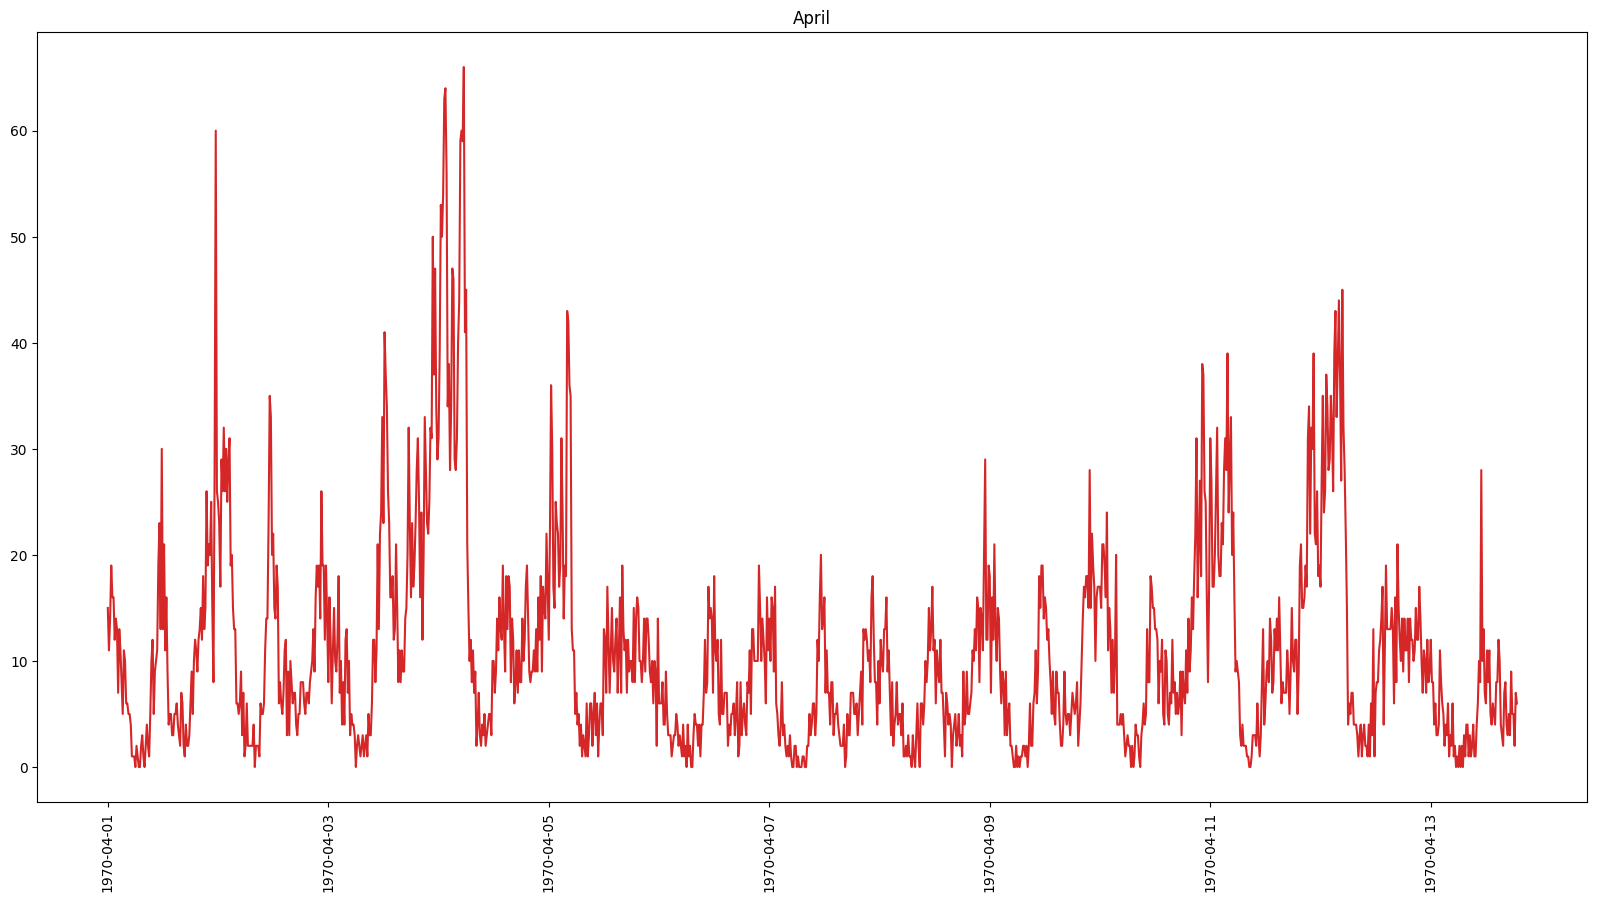

In [10]:
fig = plt.figure(figsize=(20,10))
ax = plt.axes()
ax.plot(df_apr['login_time'], df_apr['count'], 'tab:red')
plt.xticks(rotation=90)
plt.title('April')
plt.show()

In [11]:
# Randomly selected days 
df_1 = df_15[df_15['dates']=='1970-01-02']
df_2 = df_15[df_15['dates']=='1970-01-28']
df_3 = df_15[df_15['dates']=='1970-02-19']
df_4 = df_15[df_15['dates']=='1970-03-17']
df_5 = df_15[df_15['dates']=='1970-04-12']

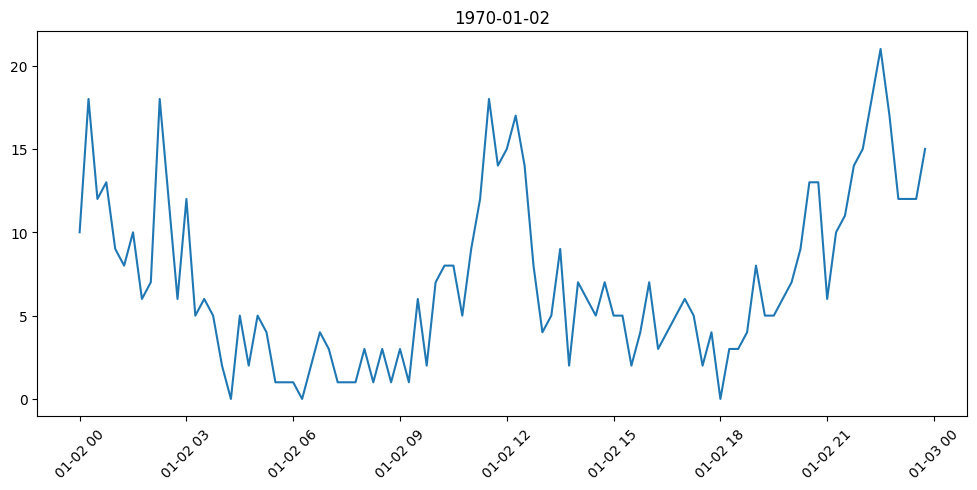

In [12]:
fig = plt.figure(figsize=(12,5))
ax = plt.axes()
ax.plot(df_1['login_time'], df_1['count'])
plt.xticks(rotation=45)
plt.title('1970-01-02')
plt.show()

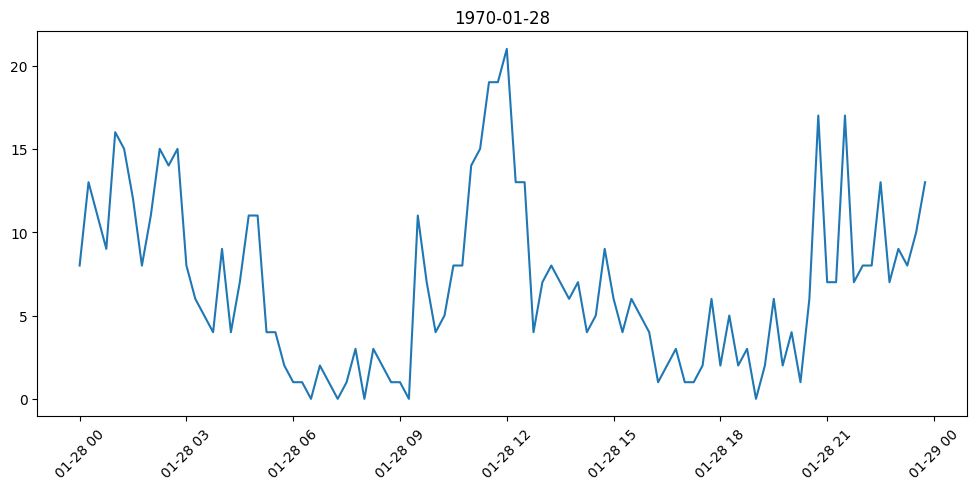

In [13]:
fig = plt.figure(figsize=(12,5))
ax = plt.axes()
ax.plot(df_2['login_time'], df_2['count'])
plt.xticks(rotation=45)
plt.title('1970-01-28')
plt.show()

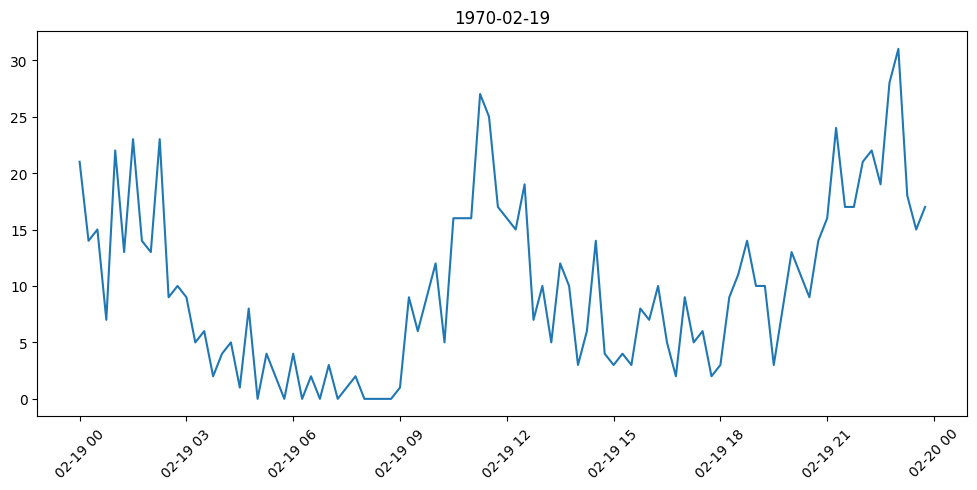

In [14]:
fig = plt.figure(figsize=(12,5))
ax = plt.axes()
ax.plot(df_3['login_time'], df_3['count'])
plt.xticks(rotation=45)
plt.title('1970-02-19')
plt.show()

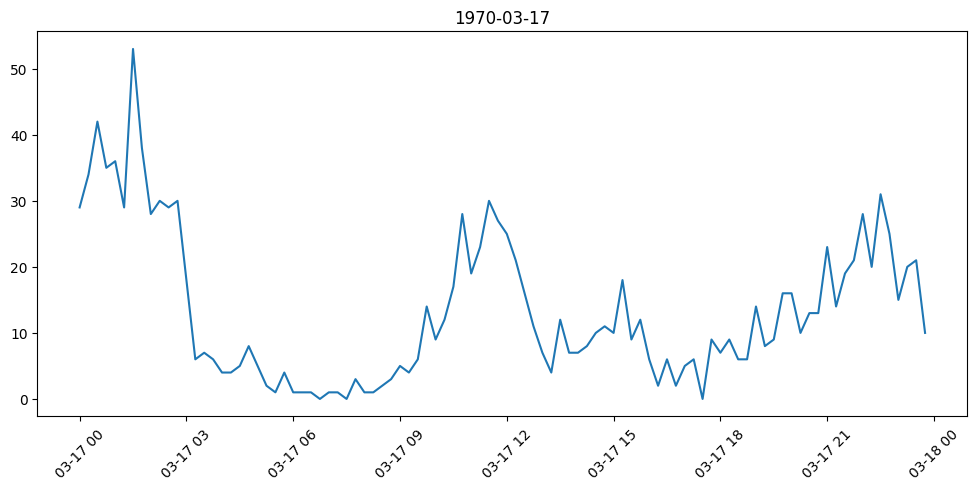

In [15]:
fig = plt.figure(figsize=(12,5))
ax = plt.axes()
ax.plot(df_4['login_time'], df_4['count'])
plt.xticks(rotation=45)
plt.title('1970-03-17')
plt.show()

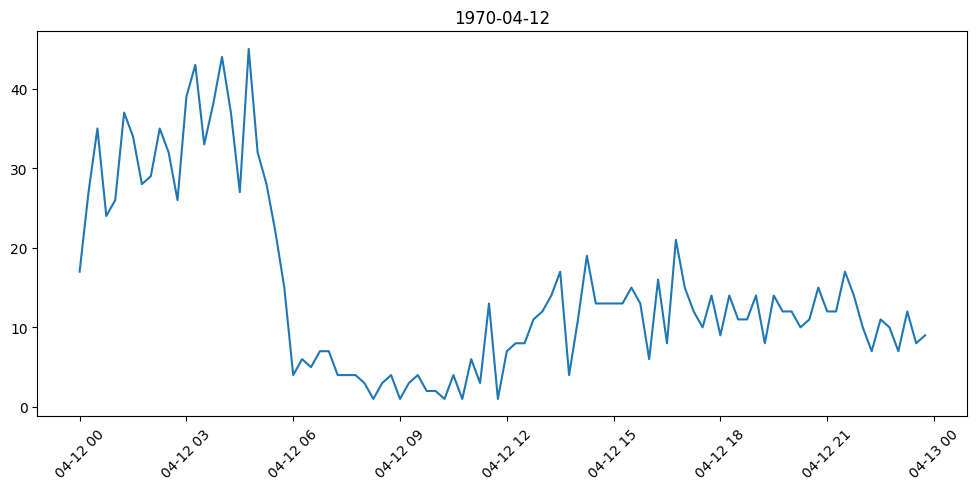

In [16]:
fig = plt.figure(figsize=(12,5))
ax = plt.axes()
ax.plot(df_5['login_time'], df_5['count'])
plt.xticks(rotation=45)
plt.title('1970-04-12')
plt.show()